https://leedakyeong.tistory.com/entry/Python-%EB%82%A0%EC%94%A8-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0Kaggle%EB%A1%9C-ARIMA-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0

In [8]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a5/07/5bef9376c975ce23306d9217ab69ca94c07f2a3c90b17c03e3ae4db87170/plotly-5.15.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 26.6 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

from matplotlib import rc # 폰트
# 유니코드 폰트 설정
rc('font', family='AppleGothic')
# 마이너스 기호 표시 설정
plt.rcParams['axes.unicode_minus'] = False

In [2]:
weather = pd.read_csv('기후데이터.csv', encoding='cp949')
weather.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2014-01-01,108,4.0,0.3,7.9
1,\t2014-01-02,108,1.5,-1.3,6.2
2,\t2014-01-03,108,2.3,-1.1,7.3
3,\t2014-01-04,108,-0.1,-3.7,5.6
4,\t2014-01-05,108,-0.8,-4.3,3.8


In [3]:
weather.columns = ['Date', 'Point', 'MeanTemp', 'LowTemp', 'HighTemp']

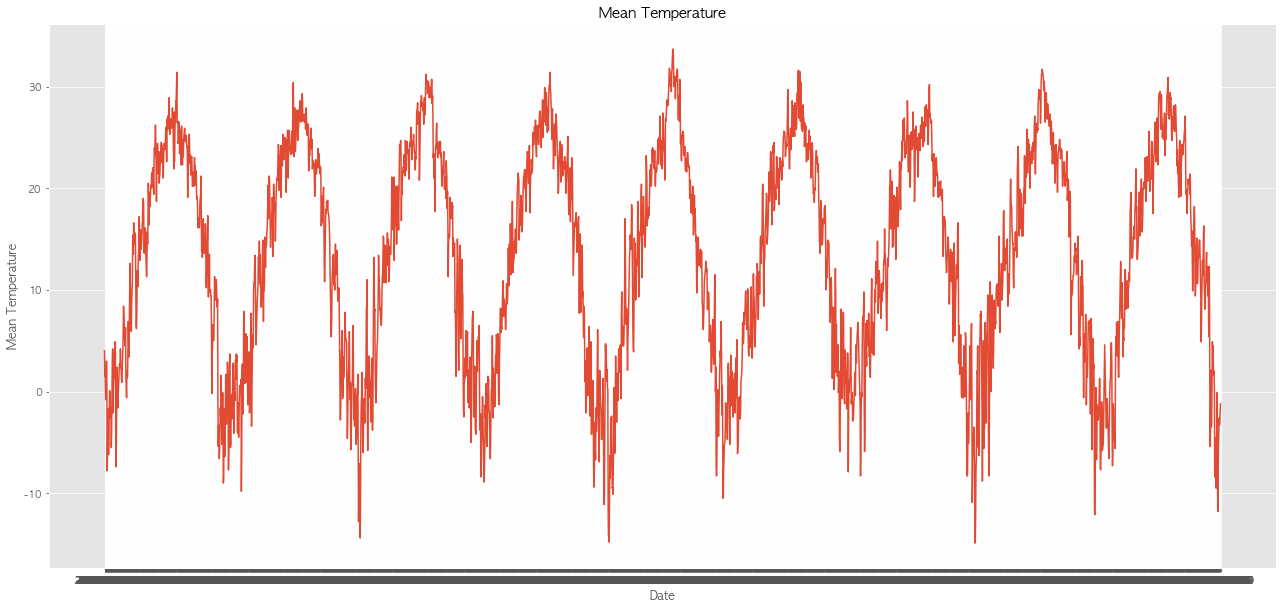

In [4]:
plt.figure(figsize=(22,10))
plt.plot(weather.Date, weather.MeanTemp)
plt.title("Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [5]:
# 2014년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2014년에 해당하는 행 추출
weather14 = weather[weather['Date'].dt.year == 2014]
weather14

,Date,Point,MeanTemp,LowTemp,HighTemp
0,2014-01-01,108,4.0,0.3,7.9
1,2014-01-02,108,1.5,-1.3,6.2
2,2014-01-03,108,2.3,-1.1,7.3
3,2014-01-04,108,-0.1,-3.7,5.6
4,2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...,...
360,2014-12-27,108,-1.8,-6.3,5.0
361,2014-12-28,108,-0.8,-3.6,1.6
362,2014-12-29,108,2.9,-0.5,6.4
363,2014-12-30,108,1.9,-1.6,6.3


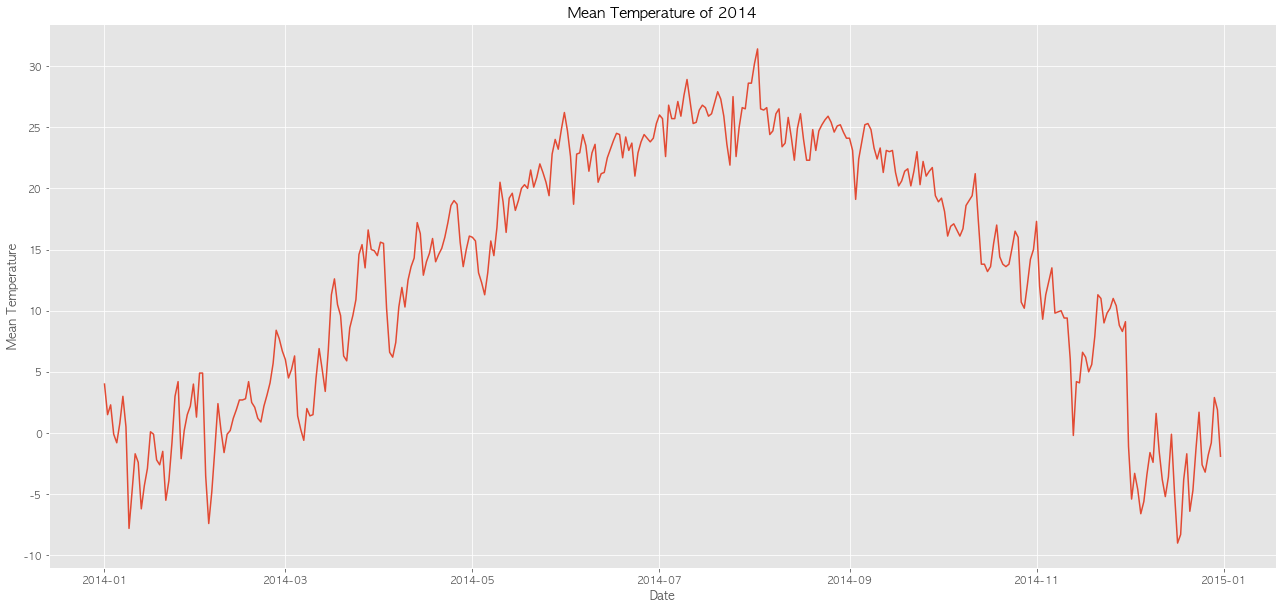

In [6]:
plt.figure(figsize=(22,10))
plt.plot(weather14.Date, weather14.MeanTemp)
plt.title("Mean Temperature of 2014")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [7]:
# 2015년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2015년에 해당하는 행 추출
weather15 = weather[weather['Date'].dt.year == 2015]
weather15

,Date,Point,MeanTemp,LowTemp,HighTemp
365,2015-01-01,108,-7.7,-9.8,-4.3
366,2015-01-02,108,-6.0,-9.0,-1.9
367,2015-01-03,108,-2.7,-9.2,3.1
368,2015-01-04,108,2.5,0.2,8.5
369,2015-01-05,108,3.7,-1.1,7.9
...,...,...,...,...,...
725,2015-12-27,108,-5.7,-8.9,-1.0
726,2015-12-28,108,-5.7,-9.5,-1.0
727,2015-12-29,108,-3.2,-8.7,2.9
728,2015-12-30,108,0.3,-3.5,4.3


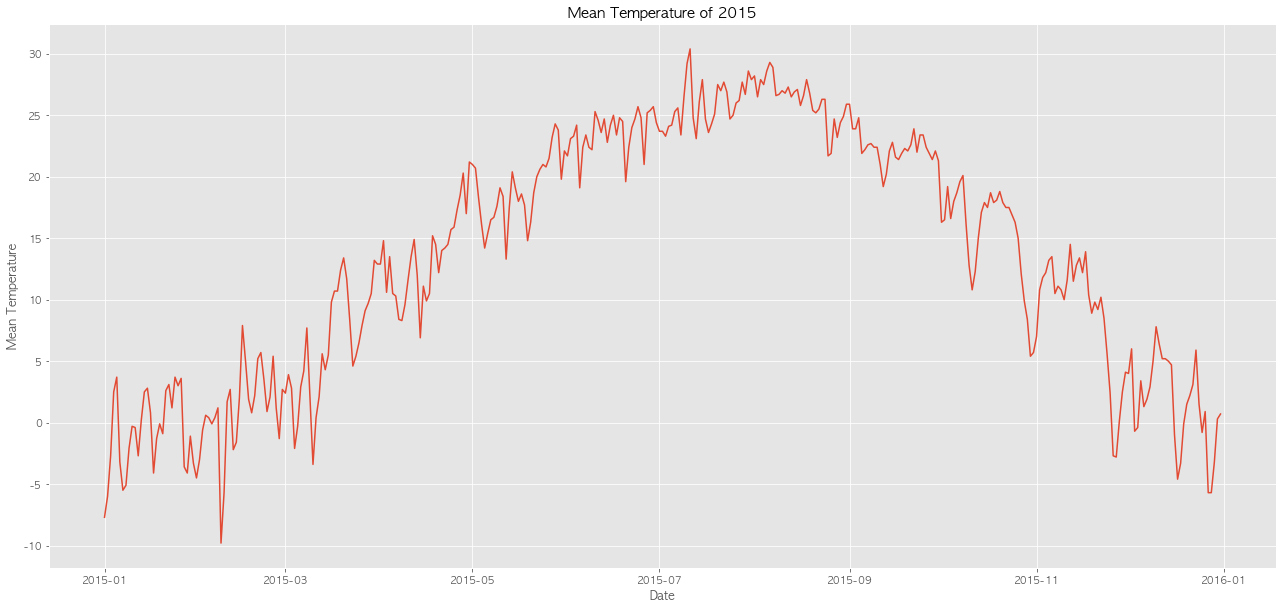

In [8]:
plt.figure(figsize=(22,10))
plt.plot(weather15.Date, weather15.MeanTemp)
plt.title("Mean Temperature of 2015")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

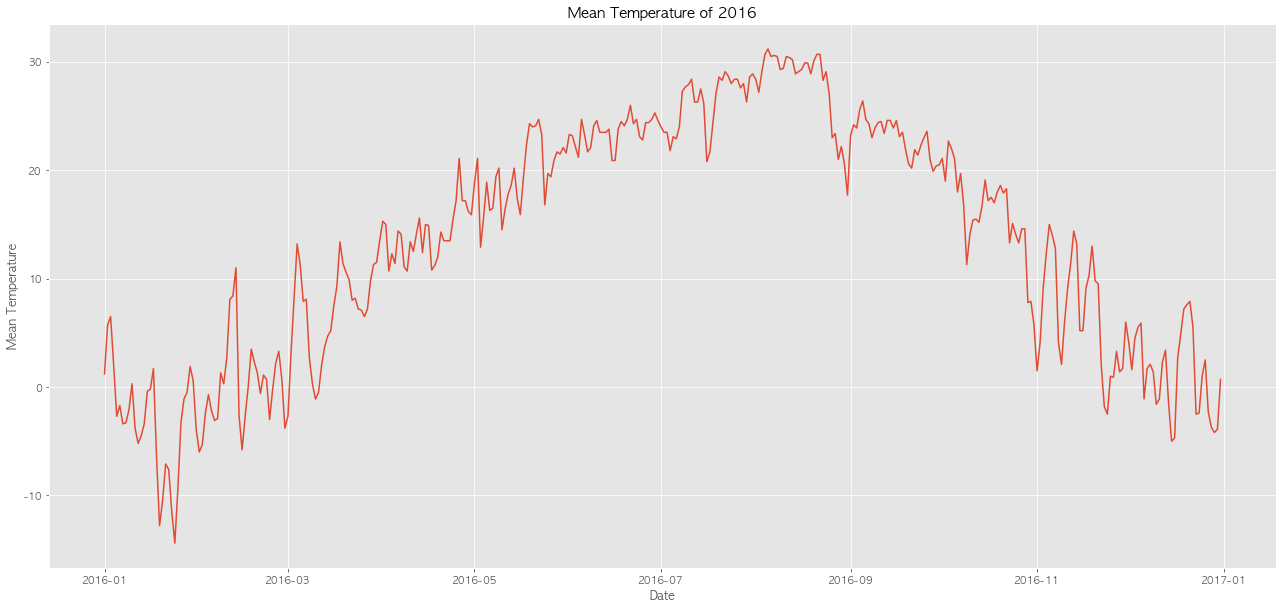

In [9]:
# 2016년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2016년에 해당하는 행 추출
weather16 = weather[weather['Date'].dt.year == 2016]

plt.figure(figsize=(22,10))
plt.plot(weather16.Date, weather16.MeanTemp)
plt.title("Mean Temperature of 2016")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

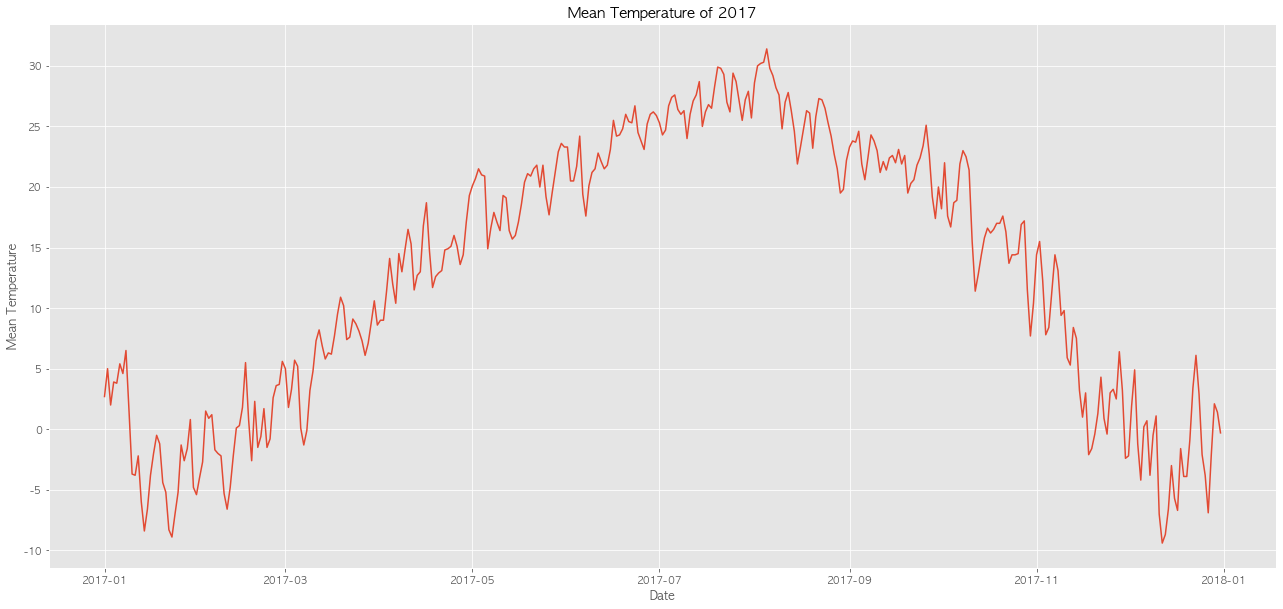

In [10]:
# 2017년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2017년에 해당하는 행 추출
weather17 = weather[weather['Date'].dt.year == 2017]

plt.figure(figsize=(22,10))
plt.plot(weather17.Date, weather17.MeanTemp)
plt.title("Mean Temperature of 2017")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

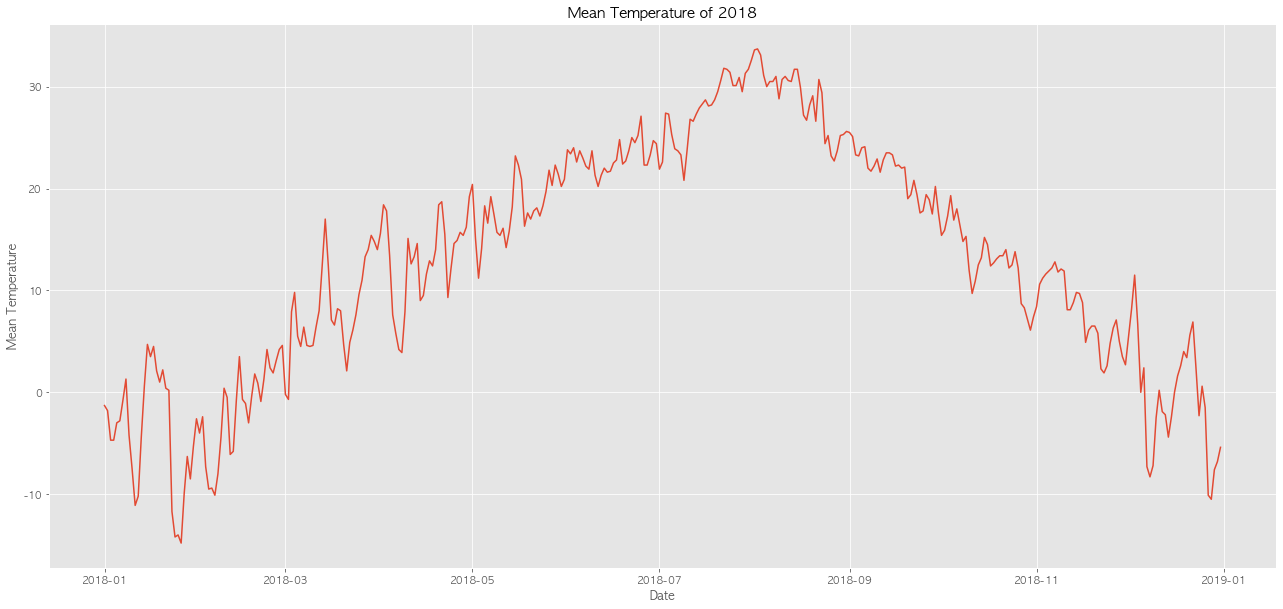

In [11]:
# 2018년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2018년에 해당하는 행 추출
weather18 = weather[weather['Date'].dt.year == 2018]

plt.figure(figsize=(22,10))
plt.plot(weather18.Date, weather18.MeanTemp)
plt.title("Mean Temperature of 2018")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

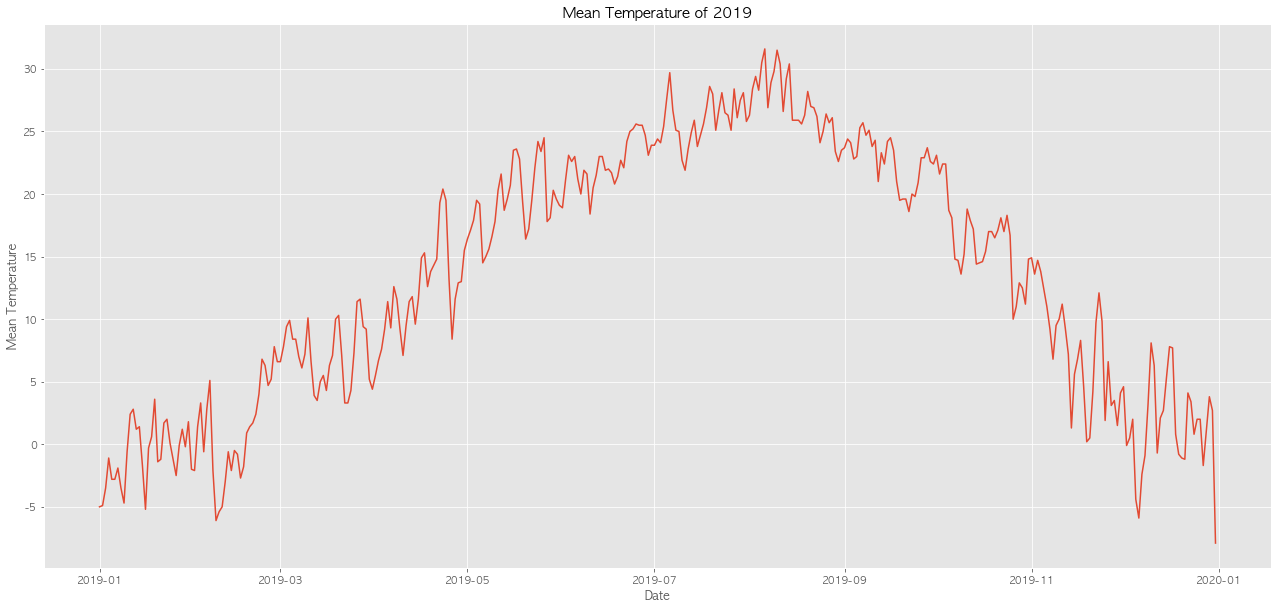

In [12]:
# 2019년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2019년에 해당하는 행 추출
weather19 = weather[weather['Date'].dt.year == 2019]

plt.figure(figsize=(22,10))
plt.plot(weather19.Date, weather19.MeanTemp)
plt.title("Mean Temperature of 2019")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

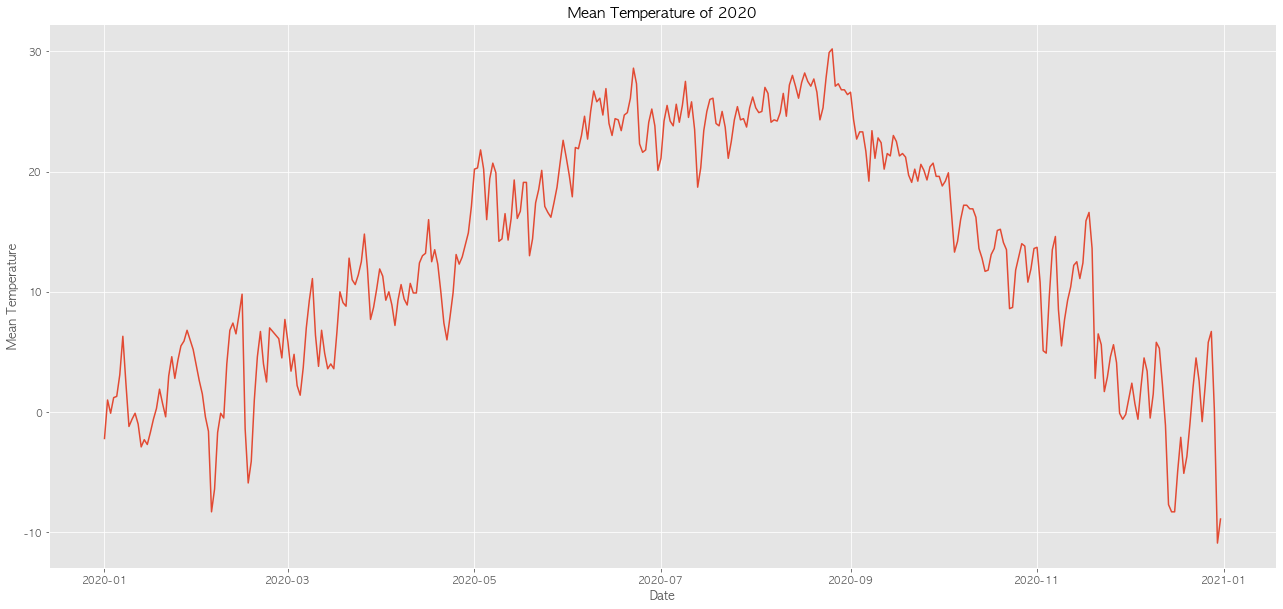

In [13]:
# 2020년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2020년에 해당하는 행 추출
weather20 = weather[weather['Date'].dt.year == 2020]

plt.figure(figsize=(22,10))
plt.plot(weather20.Date, weather20.MeanTemp)
plt.title("Mean Temperature of 2020")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

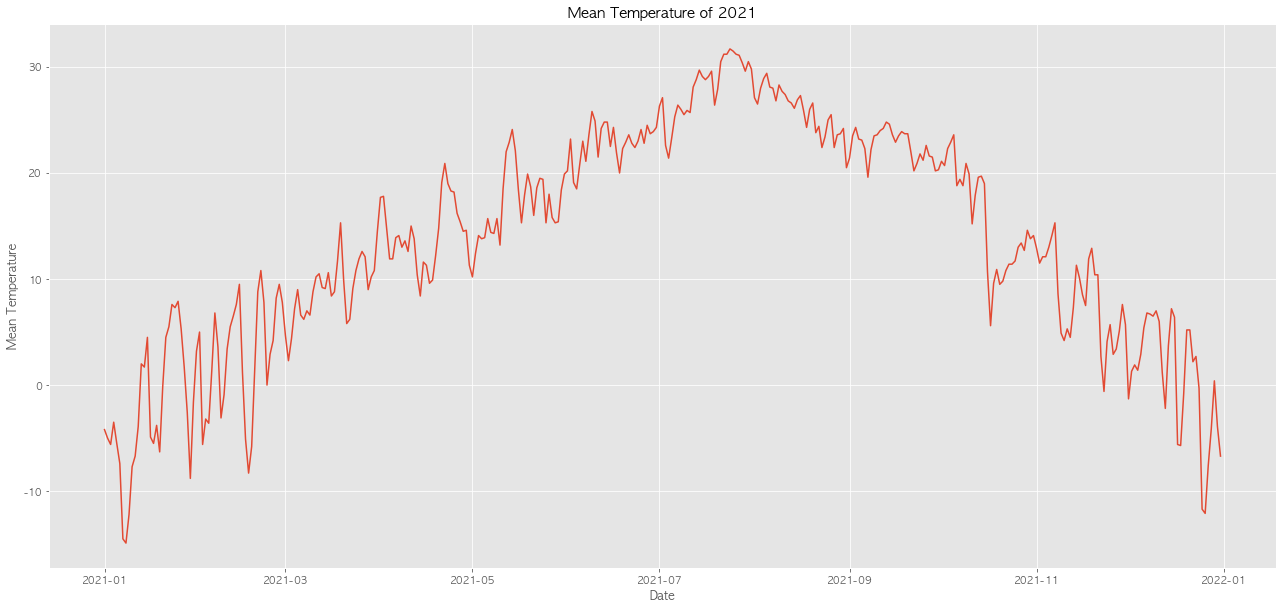

In [14]:
# 2021년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2021년에 해당하는 행 추출
weather21 = weather[weather['Date'].dt.year == 2021]

plt.figure(figsize=(22,10))
plt.plot(weather21.Date, weather21.MeanTemp)
plt.title("Mean Temperature of 2021")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

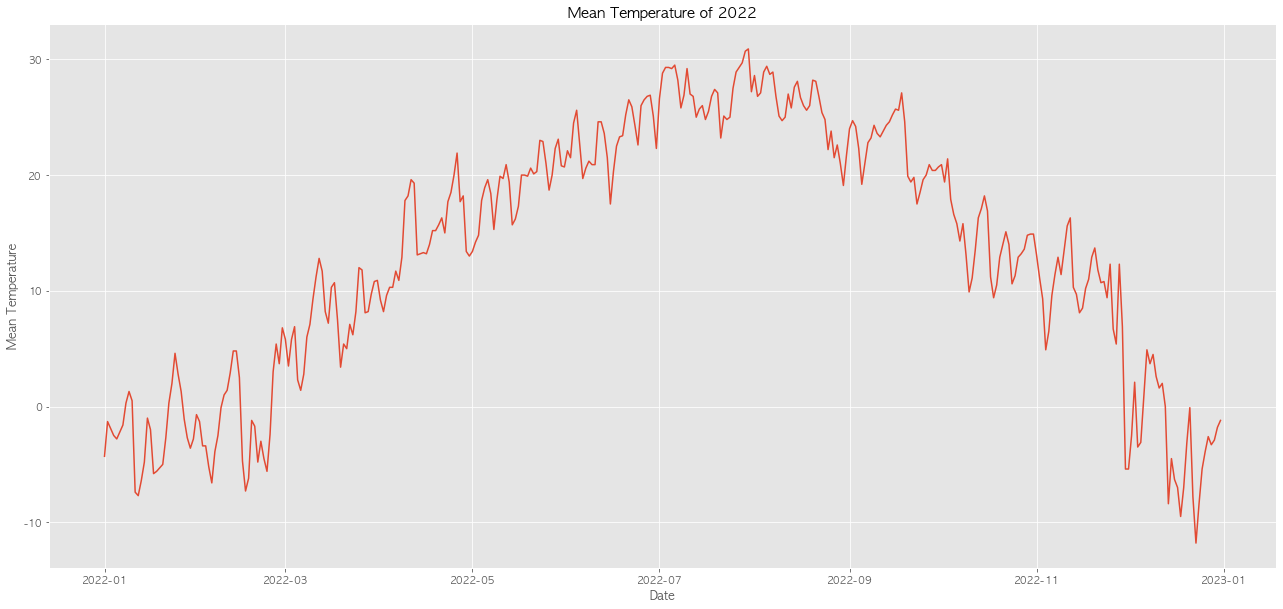

In [15]:
# 2022년 기후데이터

# 'Date' 컬럼을 datetime 형식으로 변환
weather['Date'] = pd.to_datetime(weather['Date'])

# 2022년에 해당하는 행 추출
weather22 = weather[weather['Date'].dt.year == 2022]

plt.figure(figsize=(22,10))
plt.plot(weather22.Date, weather22.MeanTemp)
plt.title("Mean Temperature of 2022")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

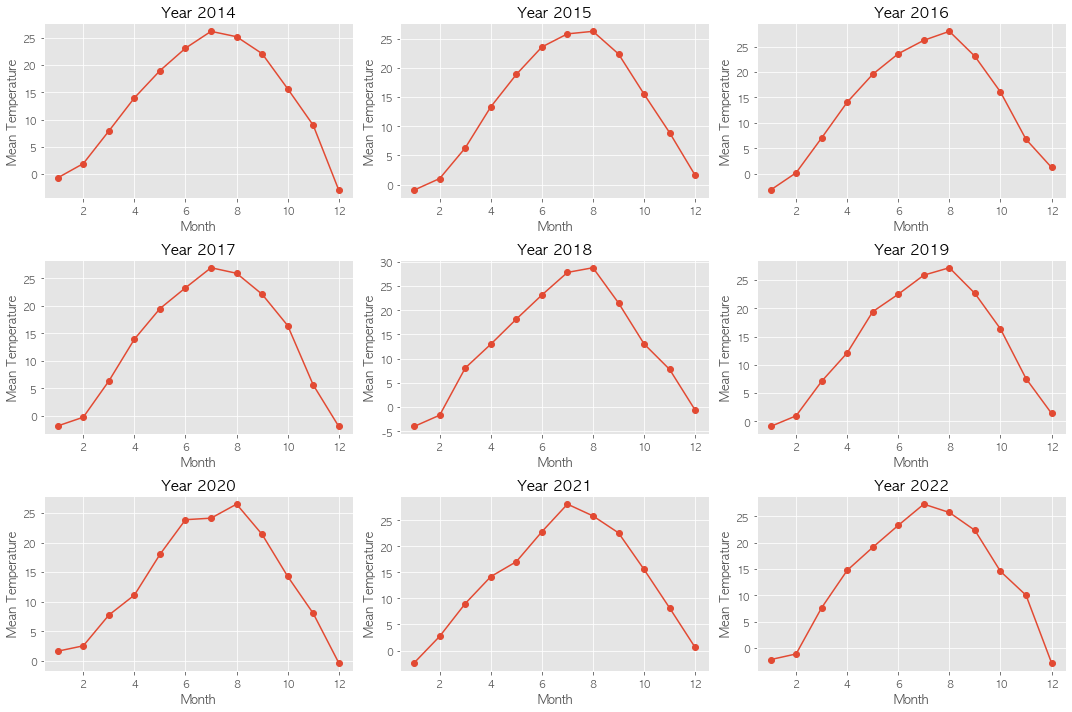

In [16]:
# 연도별 월별 평균 기온 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for year in range(2014, 2023):
    ax = axes[(year - 2014) // 3, (year - 2014) % 3]
    year_data = weather[weather['Date'].dt.year == year]
    monthly_avg = year_data.groupby(year_data['Date'].dt.month)['MeanTemp'].mean()
    ax.plot(monthly_avg.index, monthly_avg.values, marker='o')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Mean Temperature')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

In [17]:
timeSeries = weather.loc[:, ["Date", "MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis=1)

In [18]:
ts

,MeanTemp
Date,
2014-01-01,4.0
2014-01-02,1.5
2014-01-03,2.3
2014-01-04,-0.1
2014-01-05,-0.8
...,...
2022-12-27,-2.6
2022-12-28,-3.3
2022-12-29,-2.9


<Figure size 432x288 with 0 Axes>

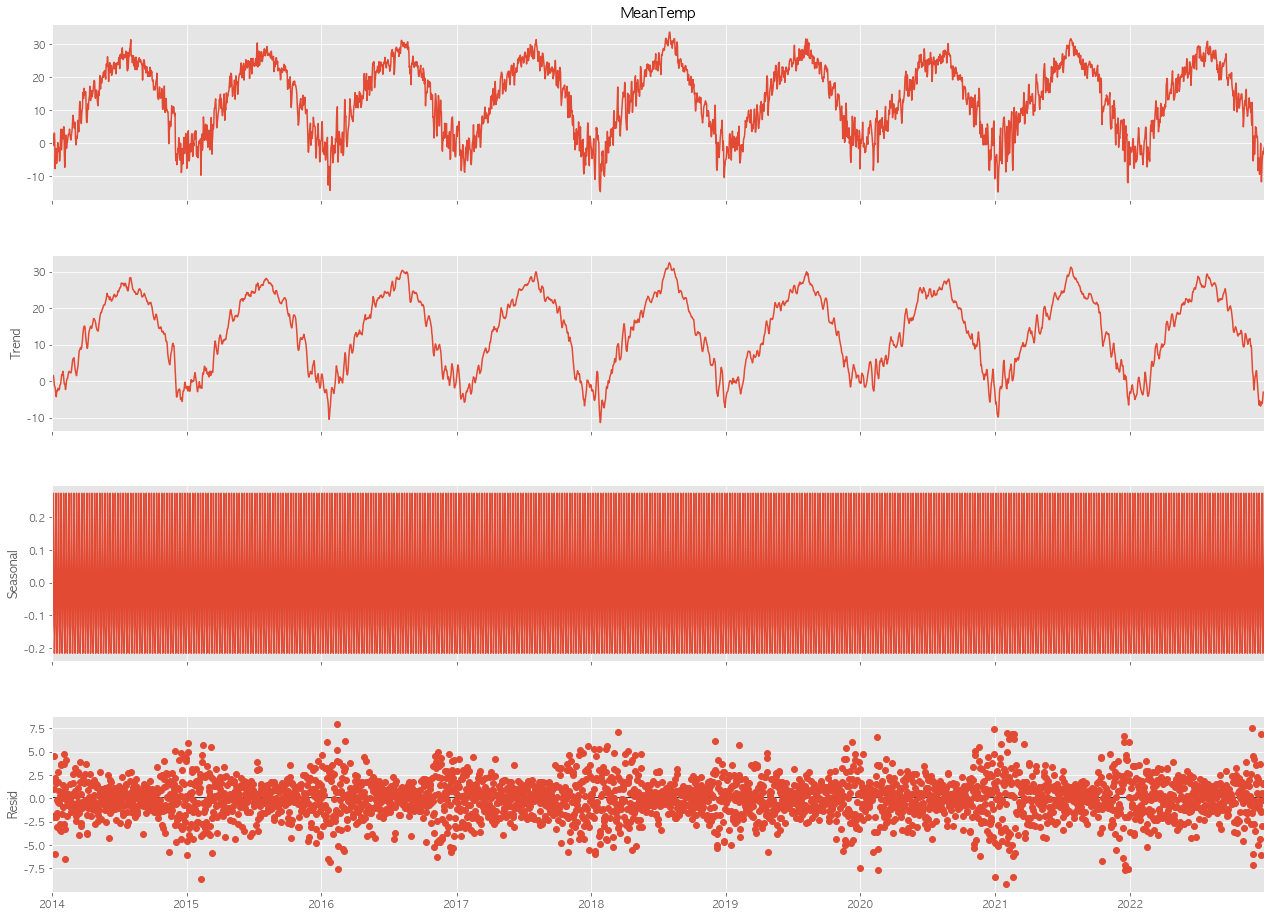

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['MeanTemp'], model = 'additive', period = 7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

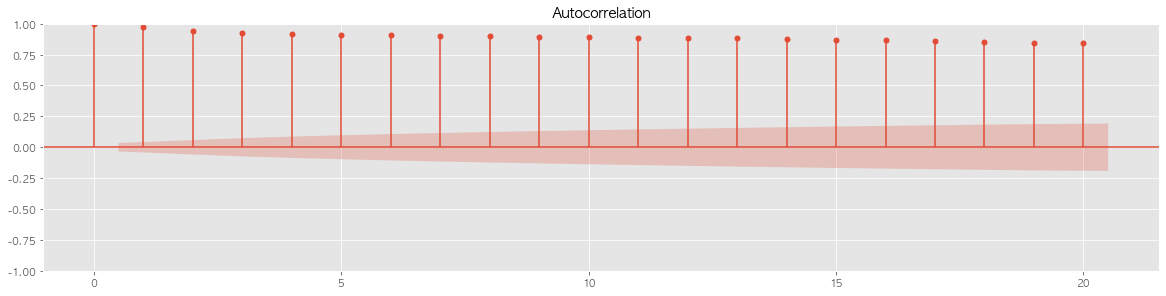

In [20]:
# ACF 그래프

import statsmodels.api as sm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [21]:
# ACF 값이 아주아주 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미함

In [23]:
# ADF 검정으로 정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.683925
p-value: 0.004345
Critical Values
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [24]:
# p-value가 0.05 넘지 않음 -> 귀무가설 기각 -> 정상성 만족?

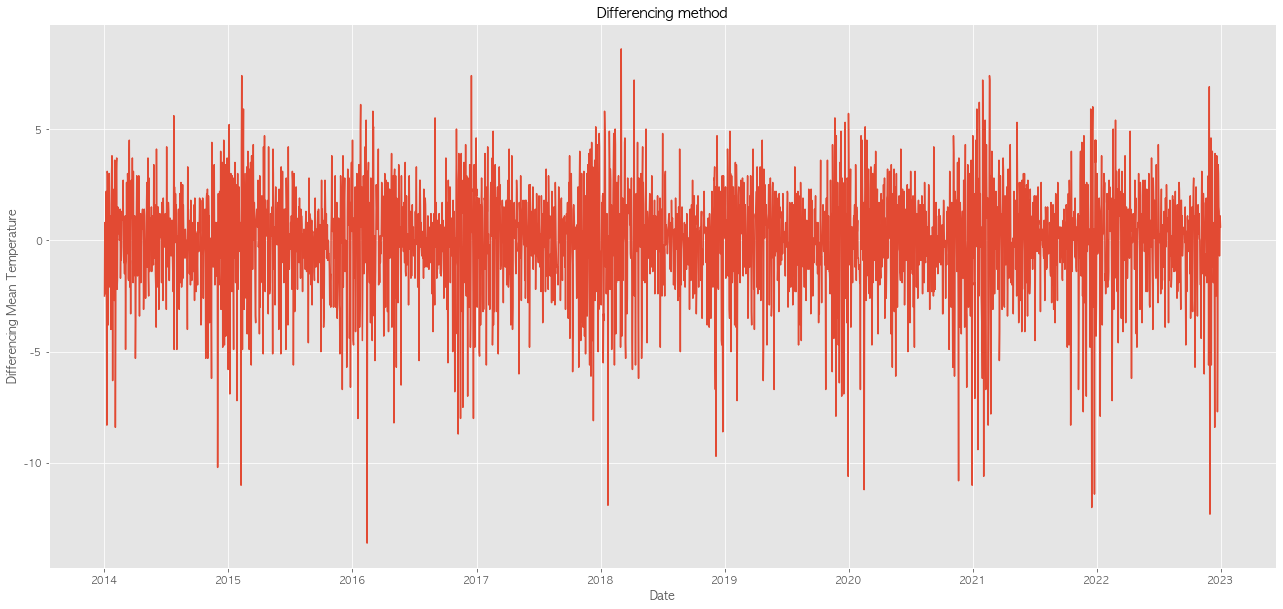

In [27]:
# 1차 차분

ts_diff = ts - ts.shift()
plt.figure(figsize=(22, 10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [29]:
# ADF 검정으로 정상성 확인

result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.338410
p-value: 0.000000
Critical Values
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [30]:
# p-value가 0.05보다 작으므로 귀무가설을 기각한다 -> 1차 차분한 데이터 정상성 만족함

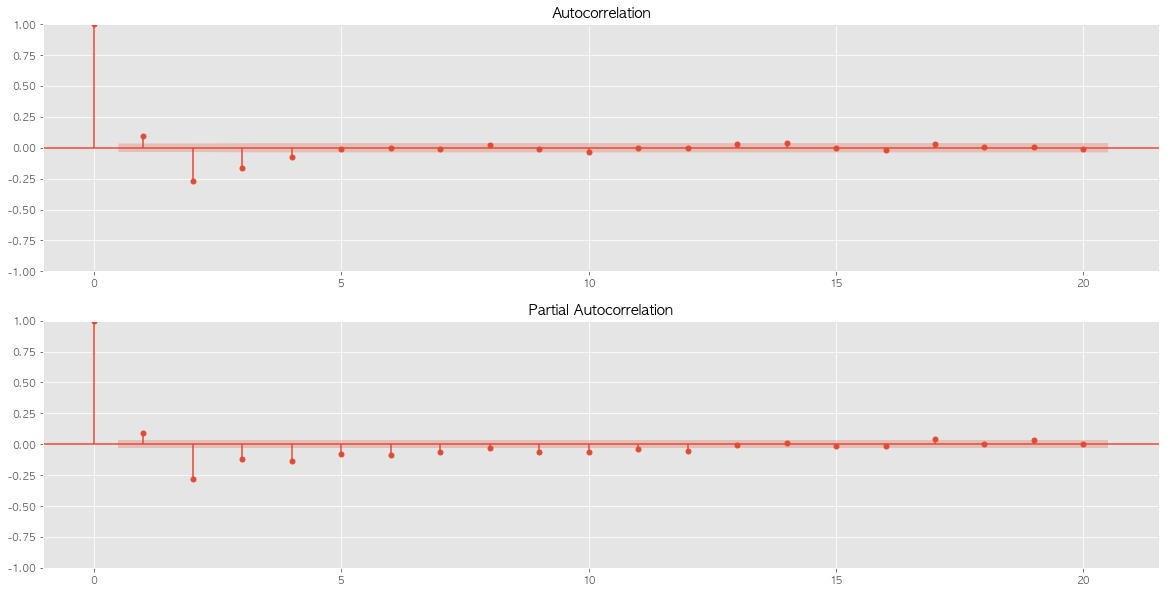

In [31]:
# 정상성을 만족하는 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정한다.

import statsmodels.api as sm

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)

In [32]:
# ACF와 PACF 모두 금방 0에 수렴하고, 2번째 lag 이후 0에 수렴함
# ARIMA(2,1,2) 모형을 base model로, ARIMA(2,1,1), ARIMA(1,1,2), ARIMA(1,1,1) 등의 모델을 시도해 볼 수 있음

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/im-yelin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



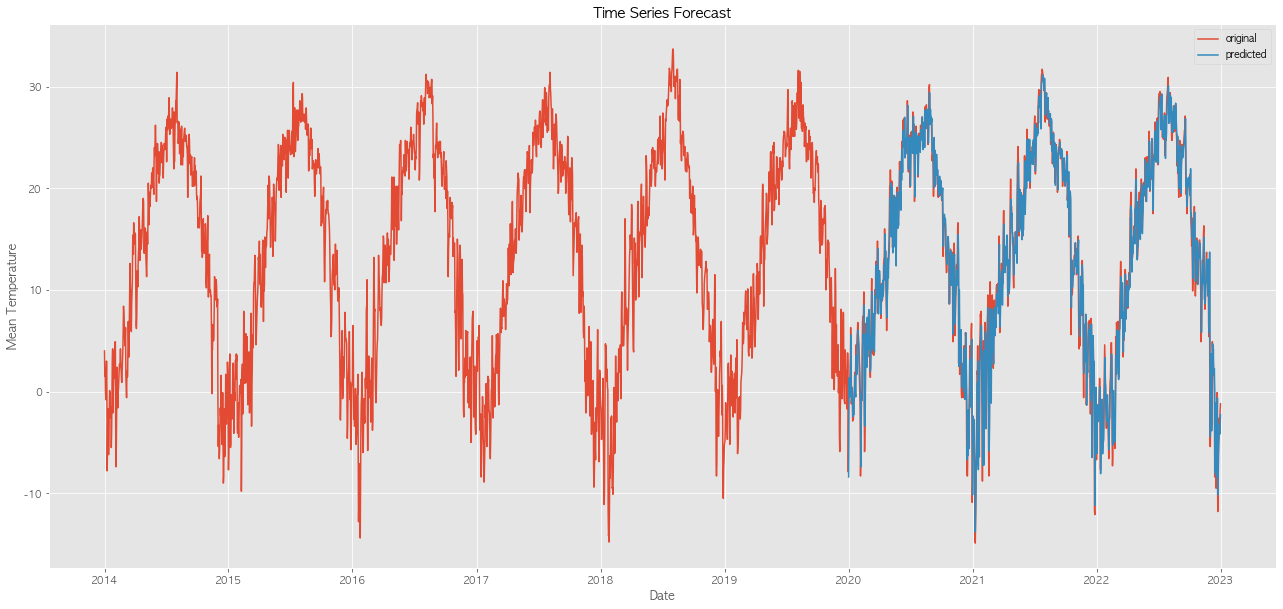

In [38]:
# ARIMA(2,1,2) 모델의 결과

from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

# predict
start_index = datetime(2020, 1, 1)
end_index = datetime(2022, 12, 31)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# visualization
plt.figure(figsize=(22, 10))
plt.plot(weather.Date, weather.MeanTemp, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


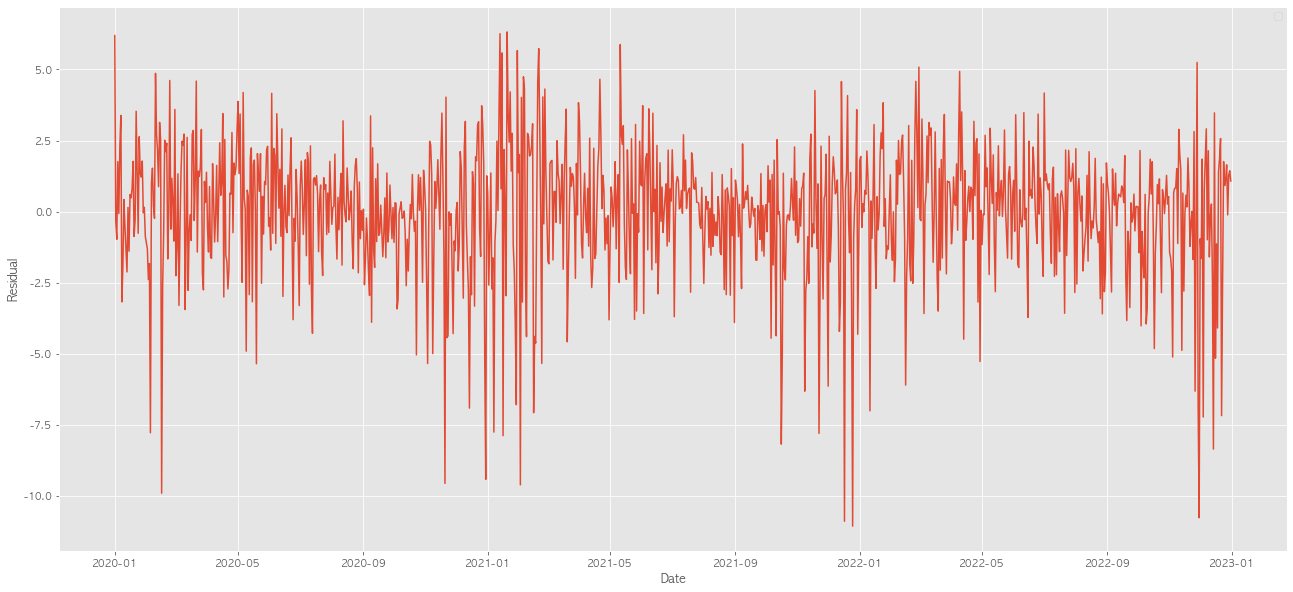

In [41]:
resi = np.array(weather[weather.Date>=start_index].MeanTemp) - np.array(forecast)

plt.figure(figsize=(22,10))
plt.plot(weather.Date[weather.Date>=start_index], resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

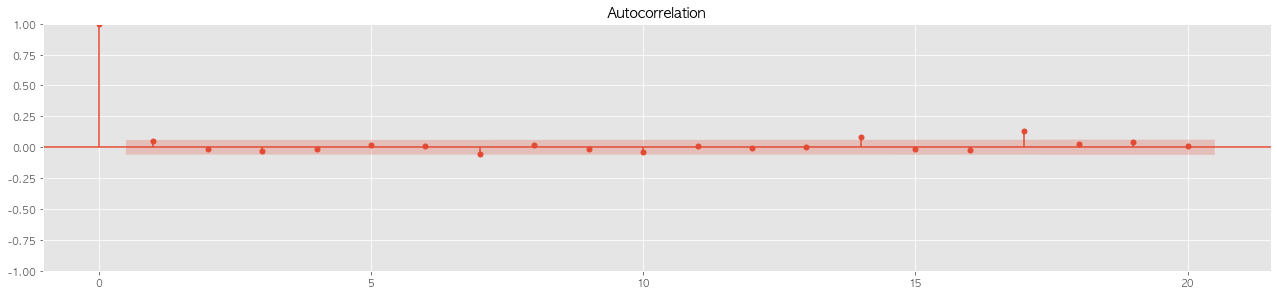

In [42]:
# ACF 그래프 및 ADF 검정을 통해 정상성 판단

fig = plt.figure(figsize=(22,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

In [43]:
result = adfuller(resi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.874079
p-value: 0.000000
Critical Values
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [46]:
# 마지막 성능 확인

from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2' : r2,
        'Corr' : corr,
        'RMSE' : rmse,
        'MAPE' : mape
    }, index = [0])
    return df

In [47]:
scoring(np.array(weather[weather.Date>=start_index].MeanTemp), np.array(forecast))

,R2,Corr,RMSE,MAPE
0,95.151,0.975,2.286,3.123539e+15
